In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
import os
for dirname, _, filenames in os.walk('D:/HK1nam4/TLCN/Project/nips-papers'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


D:/HK1nam4/TLCN/Project/nips-papers\authors.csv
D:/HK1nam4/TLCN/Project/nips-papers\database.sqlite
D:/HK1nam4/TLCN/Project/nips-papers\papers.csv
D:/HK1nam4/TLCN/Project/nips-papers\paper_authors.csv


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re, nltk
nltk.download("stopwords")
from nltk.corpus import stopwords
from wordcloud import WordCloud
import spacy
nlp = spacy.load('en_core_web_sm')
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
from tqdm import tqdm
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
import gensim
from gensim import corpora
from gensim.models.coherencemodel import CoherenceModel
import matplotlib.colors as mcolors
from collections import Counter
from matplotlib.ticker import FuncFormatter
from bokeh.plotting import figure, output_file, show
from bokeh.models import Label
from bokeh.io import output_notebook

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
C:\Users\ASUS\anaconda3\lib\site-packages\spacy\util.py:275: UserWarning: [W031] Model 'en_core_web_sm' (2.2.0) requires spaCy v2.2 and is incompatible with the current spaCy version (2.3.5). This may lead to unexpected results or runtime errors. To resolve this, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [4]:
data = pd.read_csv("D:/HK1nam4/TLCN/Project/papers.csv")
data.head()

,id,year,title,event_type,pdf_name,abstract,paper_text
0,1,1987,Self-Organization of Associative Database and ...,NaN,1-self-organization-of-associative-database-an...,Abstract Missing,767\n\nSELF-ORGANIZATION OF ASSOCIATIVE DATABA...
1,10,1987,A Mean Field Theory of Layer IV of Visual Cort...,NaN,10-a-mean-field-theory-of-layer-iv-of-visual-c...,Abstract Missing,683\n\nA MEAN FIELD THEORY OF LAYER IV OF VISU...
2,100,1988,Storing Covariance by the Associative Long-Ter...,NaN,100-storing-covariance-by-the-associative-long...,Abstract Missing,394\n\nSTORING COVARIANCE BY THE ASSOCIATIVE\n...
3,1000,1994,Bayesian Query Construction for Neural Network...,NaN,1000-bayesian-query-construction-for-neural-ne...,Abstract Missing,Bayesian Query Construction for Neural\nNetwor...
4,1001,1994,"Neural Network Ensembles, Cross Validation, an...",NaN,1001-neural-network-ensembles-cross-validation...,Abstract Missing,"Neural Network Ensembles, Cross\nValidation, a..."


Text(0.5, 1.0, 'Frequency showing number of papers released in different years')

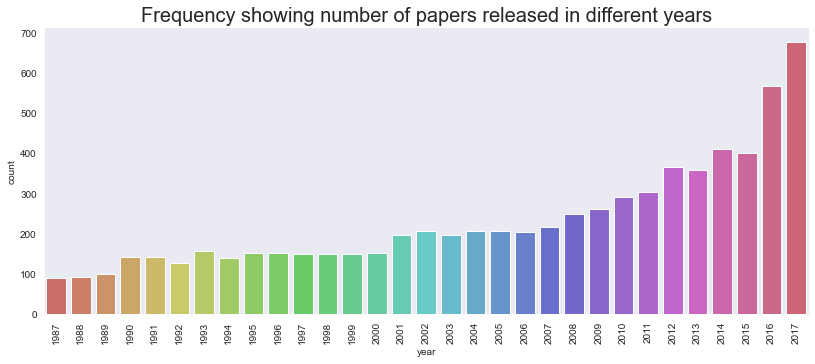

In [5]:
sns.set_style("dark")
graph = sns.catplot(data=data, x="year", kind="count", height = 4.5, aspect = 2.5, palette = "hls")
graph.set_xticklabels(rotation=90)
plt.title("Frequency showing number of papers released in different years", size = 20)

In [6]:
pd.set_option('display.max_colwidth', None)
data["paper_text"].head()

0    767\n\nSELF-ORGANIZATION OF ASSOCIATIVE DATABASE\nAND ITS APPLICATIONS\nHisashi Suzuki and Suguru Arimoto\nOsaka University, Toyonaka, Osaka 560, Japan\nABSTRACT\nAn efficient method of self-organizing associative databases is proposed together with\napplications to robot eyesight systems. The proposed databases can associate any input\nwith some output. In the first half part of discussion, an algorithm of self-organization is\nproposed. From an aspect of hardware, it produces a new style of neural network. In the\nlatter half part, an applicability to handwritten letter recognition and that to an autonomous\nmobile robot system are demonstrated.\n\nINTRODUCTION\nLet a mapping f : X -+ Y be given. Here, X is a finite or infinite set, and Y is another\nfinite or infinite set. A learning machine observes any set of pairs (x, y) sampled randomly\nfrom X x Y. (X x Y means the Cartesian product of X and Y.) And, it computes some\nestimate j : X -+ Y of f to make small, the estimation 

In [7]:
data['Number_of_words'] = data['paper_text'].apply(lambda x:len(str(x).split()))

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Frequency distribution of number of words for each text extracted')

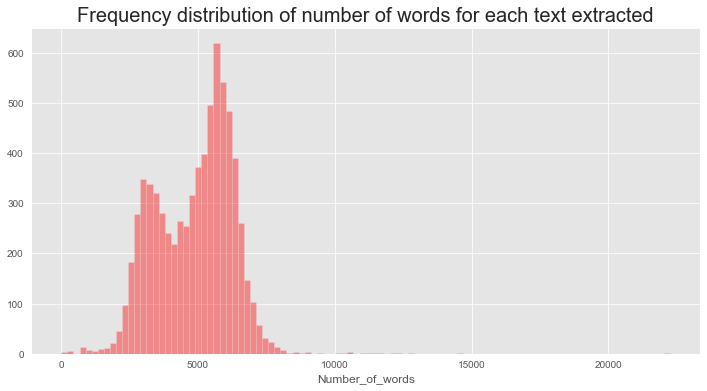

In [8]:
plt.style.use('ggplot')
plt.figure(figsize=(12,6))
sns.distplot(data['Number_of_words'],kde = False,color="red", bins = 100)
plt.title("Frequency distribution of number of words for each text extracted", size=20)

In [9]:
def cleaned_text(text):
    clean = re.sub("\n"," ",text)
    clean=clean.lower()
    clean=re.sub(r"[~.,%/:;?_&+*=!-]"," ",clean)
    clean=re.sub("[^a-z]"," ",clean)
    clean=clean.lstrip()
    clean=re.sub("\s{2,}"," ",clean)
    return clean
data["cleaned_paper_text"]=data["paper_text"].apply(cleaned_text)

In [10]:
data["cleaned_paper_text"] = data["cleaned_paper_text"].apply(lambda x: ' '.join([word for word in x.split() if len(word)>3]))

In [11]:
data["cleaned_paper_text"].head(10)

0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       

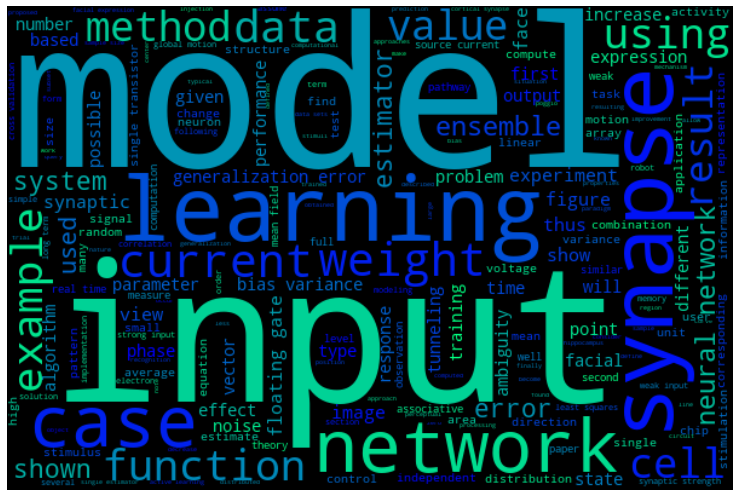

In [12]:
cloud=WordCloud(colormap="winter",width=600,height=400).generate(str(data["cleaned_paper_text"]))
fig=plt.figure(figsize=(13,18))
plt.axis("off")
plt.imshow(cloud,interpolation='bilinear')

In [13]:
stop=stopwords.words('english')
stop.append("also")
data["stop_removed_paper_text"]=data["cleaned_paper_text"].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [14]:
data["tokenized"]=data["stop_removed_paper_text"].apply(lambda x: nltk.word_tokenize(x))

In [15]:
def word_lemmatizer(text):
    lem_text = [WordNetLemmatizer().lemmatize(i,pos='v') for i in text]
    return lem_text
data["lemmatized"]=data["tokenized"].apply(lambda x: word_lemmatizer(x))
data["lemmatize_joined"]=data["lemmatized"].apply(lambda x: ' '.join(x))

In [16]:
data["lemmatize_joined"].head()

0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           self organization associative database applications hisashi suzuki suguru arimoto osaka university toyonaka osaka japan abstract efficient method self organize associative databases propose together applications robot eyesight systems propose databases associate input output first ha

In [17]:
data['Number_of_words_for_cleaned'] = data['lemmatize_joined'].apply(lambda x:len(str(x).split()))

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Frequency distribution of number of words for each text extracted after removing stopwords and lemmatization')

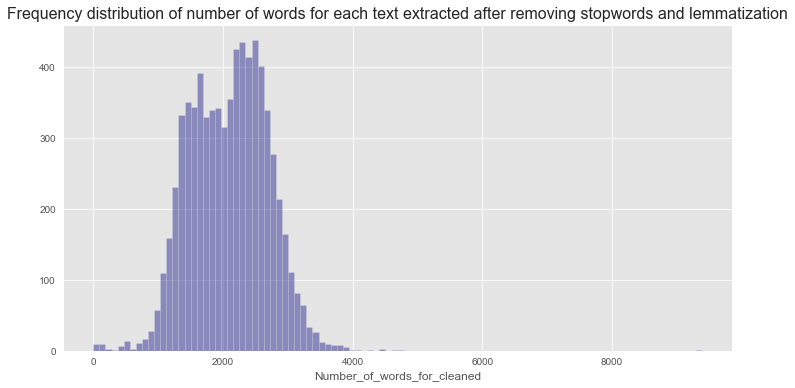

In [18]:
plt.style.use('ggplot')
plt.figure(figsize=(12,6))
sns.distplot(data['Number_of_words_for_cleaned'],kde = False, color= "navy", bins = 100)
plt.title("Frequency distribution of number of words for each text extracted after removing stopwords and lemmatization", size=16)

In [19]:
data.drop(data[data["Number_of_words_for_cleaned"]>4500].index, inplace = True)

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Frequency distribution of no of words in the documents after removing docs containing > 4500 words')

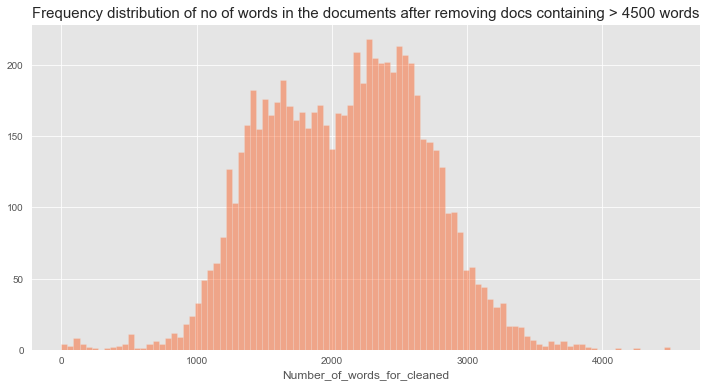

In [20]:
plt.style.use('ggplot')
plt.figure(figsize=(12,6))
sns.distplot(data['Number_of_words_for_cleaned'],kde = False, color= "orangered", bins = 100)
plt.title("Frequency distribution of no of words in the documents after removing docs containing > 4500 words", size=15)

Text(0.5, 1.0, '30 most frequent words')

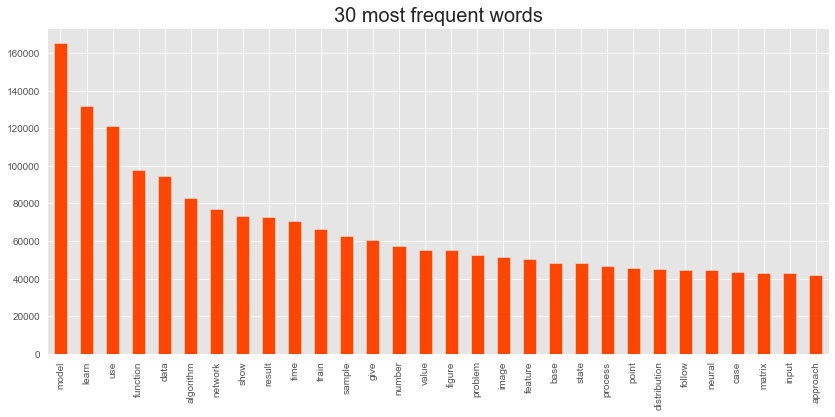

In [21]:
plt.style.use('ggplot')
plt.figure(figsize=(14,6))
freq=pd.Series(" ".join(data["lemmatize_joined"]).split()).value_counts()[:30]
freq.plot(kind="bar", color = "orangered")
plt.title("30 most frequent words",size=20)

In [22]:
#Topic modeling 
dictionary = corpora.Dictionary(data["lemmatized"])
doc_term_matrix = [dictionary.doc2bow(rev) for rev in data["lemmatized"]]

In [23]:
LDA = gensim.models.ldamodel.LdaModel 

In [24]:


# Build LDA model
lda_model = LDA(corpus=doc_term_matrix, id2word=dictionary, num_topics=4, random_state=150,
                chunksize=200, passes=100)

In [25]:
lda_model.print_topics()

[(0,
  '0.011*"algorithm" + 0.010*"function" + 0.008*"learn" + 0.007*"data" + 0.007*"matrix" + 0.007*"problem" + 0.006*"result" + 0.006*"use" + 0.005*"sample" + 0.005*"show"'),
 (1,
  '0.016*"model" + 0.015*"train" + 0.014*"learn" + 0.014*"image" + 0.012*"use" + 0.011*"network" + 0.010*"feature" + 0.007*"layer" + 0.007*"data" + 0.006*"task"'),
 (2,
  '0.018*"model" + 0.009*"learn" + 0.008*"state" + 0.008*"use" + 0.007*"sample" + 0.007*"time" + 0.007*"function" + 0.006*"algorithm" + 0.006*"distribution" + 0.006*"value"'),
 (3,
  '0.020*"network" + 0.011*"model" + 0.011*"neural" + 0.011*"input" + 0.008*"time" + 0.007*"learn" + 0.006*"figure" + 0.006*"output" + 0.006*"weight" + 0.006*"use"')]

In [26]:
coherence_model_lda = CoherenceModel(model=lda_model,
texts=data["lemmatized"], dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.34392141024049383


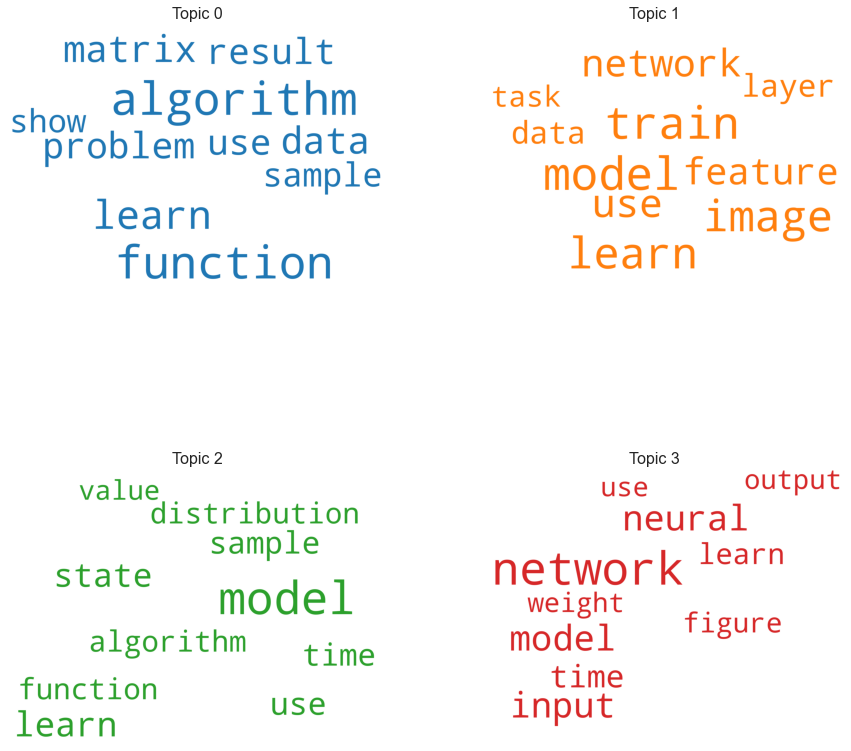

In [27]:
#WordClouds for Topics' Keywords
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(2, 2, figsize=(15,15), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')

In [28]:
#Dominant topic for each Document
def format_topics_sentences(ldamodel=None, corpus=None, texts=data):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=doc_term_matrix, texts=data["lemmatized"])

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,3.0,0.3182,"network, model, neural, input, time, learn, figure, output, weight, use","[self, organization, associative, database, applications, hisashi, suzuki, suguru, arimoto, osaka, university, toyonaka, osaka, japan, abstract, efficient, method, self, organize, associative, databases, propose, together, applications, robot, eyesight, systems, propose, databases, associate, input, output, first, half, part, discussion, algorithm, self, organization, propose, aspect, hardware, produce, style, neural, network, latter, half, part, applicability, handwritten, letter, recognition, autonomous, mobile, robot, system, demonstrate, introduction, map, give, finite, infinite, another, finite, infinite, learn, machine, observe, pair, sample, randomly, mean, cartesian, product, compute, estimate, make, small, estimation, error, measure, usually, faster, decrease, estimation, error, increase, number, sample, better, learn, machine, however, expression, performance, incomplete, since, lack, consideration, ...]"
1,1,3.0,0.9796,"network, model, neural, input, time, learn, figure, output, weight, use","[mean, field, theory, layer, visual, cortex, application, artificial, neural, network, christopher, scofield, center, neural, science, physics, department, brown, university, providence, rhode, island, nestor, richmond, square, providence, rhode, island, abstract, single, cell, theory, development, selectivity, ocular, dominance, visual, cortex, present, previously, bienenstock, cooper, munrol, extend, network, applicable, layer, visual, cortex, paper, present, mean, field, approximation, capture, fairly, transparent, manner, qualitative, many, quantitative, result, network, theory, finally, consider, application, theory, artificial, neural, network, show, significant, reduction, architectural, complexity, possible, single, layer, network, mean, field, approximation, consider, single, layer, network, ideal, neurons, receive, signal, outside, layer, cells, within, layer, figure, activity, cell, network, ...]"
2,2,3.0,0.9979,"network, model, neural, input, time, learn, figure, output, weight, use","[store, covariance, associative, long, term, potentiation, depression, synaptic, strengths, hippocampus, patric, stanton, terrence, sejnowski, department, biophysics, johns, hopkins, university, baltimore, abstract, model, study, memory, base, neural, network, selective, enhancement, depression, synaptic, strengths, require, effident, storage, inrormation, sejnowski, kohonen, bienenstock, sejnowski, tesauro, test, assumption, hippocampus, cortical, structure, brain, involve, long, term, memory, brier, high, frequency, activation, excitatory, synapses, hippocampus, produce, increase, synaptic, strength, know, long, term, potentiation, bus, lomo, last, many, days, know, hebbian, since, require, simultaneous, release, neurotransmitter, presynaptic, terminals, couple, postsynaptic, depolarization, kelso, malinow, miller, gustatrson, however, mechanism, persistent, reduction, synaptic, strength, could, balance, demonstrate, study, associative, interactions, separate, ...]"
3,3,2.0,0.4824,"model, learn, state, use, sample, time, function, algorithm, distribution, value","[bayesian, query, construction, neural, network, model, gerhard, paass, jorg, kindermann, german, national, research, center, computer, science, sankt, augustin, germany, paass, kindermann, abstract, data, collection, costly, much, gain, actively, select, particularly, informative, data, point, sequential, bayesian, decision, theoretic, framework, develop, query, selection, criterion, explicitly, take, account, intend, model, predictions, markov, chain, monte, carlo, methods, necessary, quantities, approximate, desire, precision, number, data, point, grow, model, complexity, modify, bayesian, model, selection, strategy, properties, versions, criterion, demonstrate, numerical, experiment, introduction, paper, consider, situatio

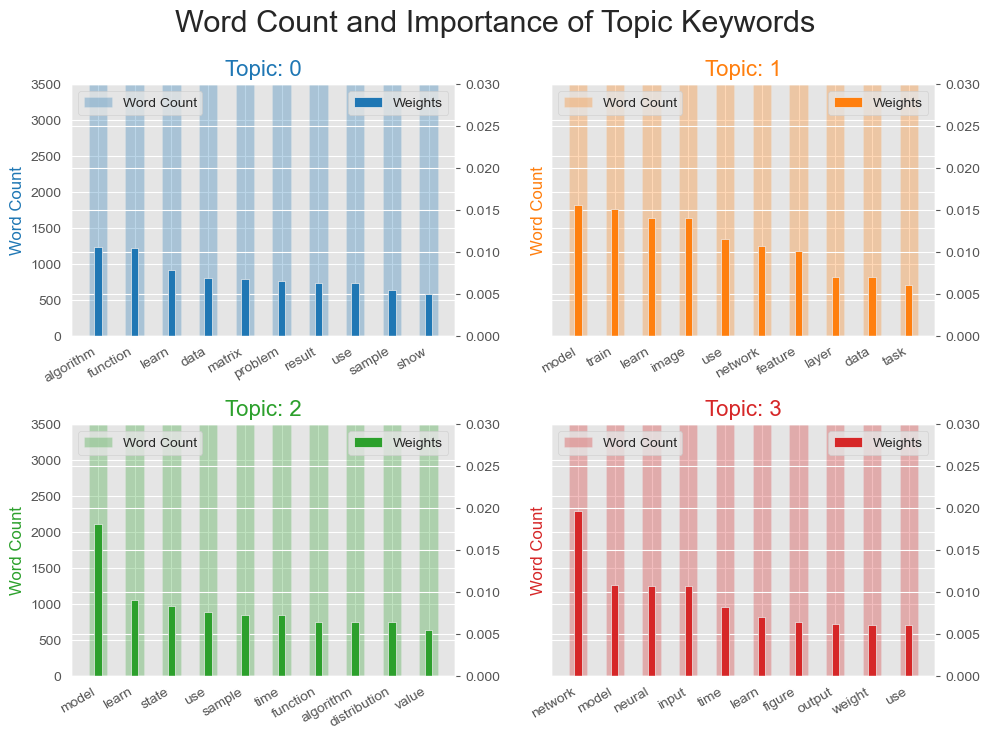

In [29]:
topics = lda_model.show_topics(formatted=False)
data_flat = [w for w_list in data["lemmatized"] for w in w_list]
counter = Counter(data_flat)

out = []
for i, topic in topics:
    for word, weight in topic:
        out.append([word, i , weight, counter[word]])

df = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])        

# Plot Word Count and Weights of Topic Keywords
fig, axes = plt.subplots(2, 2, figsize=(10,7), sharey=True, dpi=100)
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
for i, ax in enumerate(axes.flatten()):
    ax.bar(x='word', height="word_count", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.5, alpha=0.3, label='Word Count')
    ax_twin = ax.twinx()
    ax_twin.bar(x='word', height="importance", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.2, label='Weights')
    ax.set_ylabel('Word Count', color=cols[i])
    ax_twin.set_ylim(0, 0.030); ax.set_ylim(0, 3500)
    ax.set_title('Topic: ' + str(i), color=cols[i], fontsize=16)
    ax.tick_params(axis='y', left=False)
    ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
    ax.legend(loc='upper left'); ax_twin.legend(loc='upper right')

fig.tight_layout(w_pad=2)    
fig.suptitle('Word Count and Importance of Topic Keywords', fontsize=22, y=1.05)    
plt.show()

Text(0, 0.5, 'Number of documents')

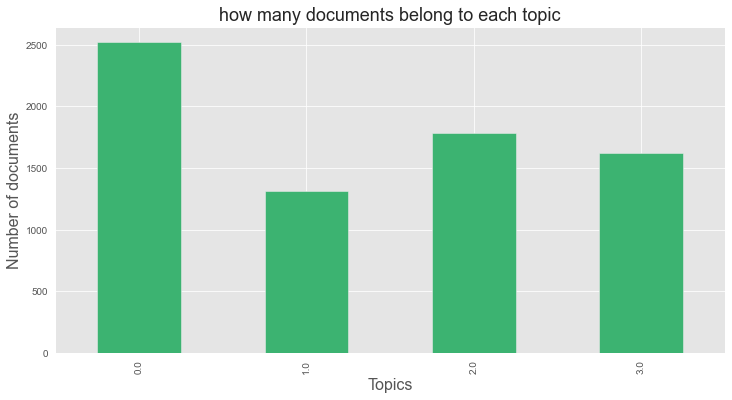

In [30]:
topic_counts = df_dominant_topic["Dominant_Topic"].value_counts()
topic_counts.plot(kind = "bar", color = "mediumseagreen", figsize = (12,6))
plt.title("how many documents belong to each topic", size = 18)
plt.xlabel("Topics", size = 16)
plt.ylabel("Number of documents", size = 16)

Text(0.5, 1.0, 'WordCloud for Topic 0')

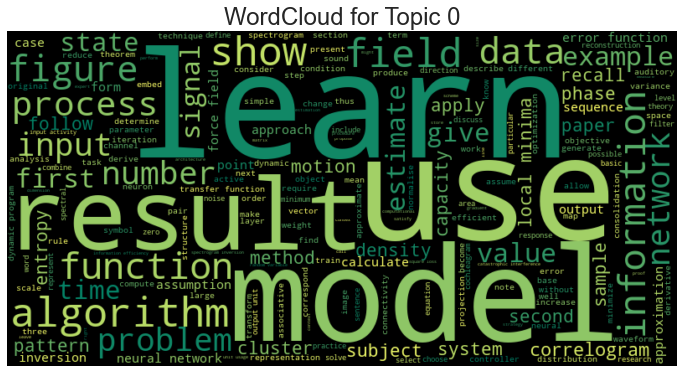

In [31]:
#Word Clouds for each topic
data["Dominant Topic"] = df_dominant_topic["Dominant_Topic"]
cloud=WordCloud(colormap="summer",width=800,height=400).generate(str(data[data["Dominant Topic"]==0.0]["lemmatize_joined"]))
fig=plt.figure(figsize=(12,10))
plt.axis("off")
plt.imshow(cloud,interpolation='bilinear')
plt.title("WordCloud for Topic 0", size = 24)

Text(0.5, 1.0, 'WordCloud for Topic 1')

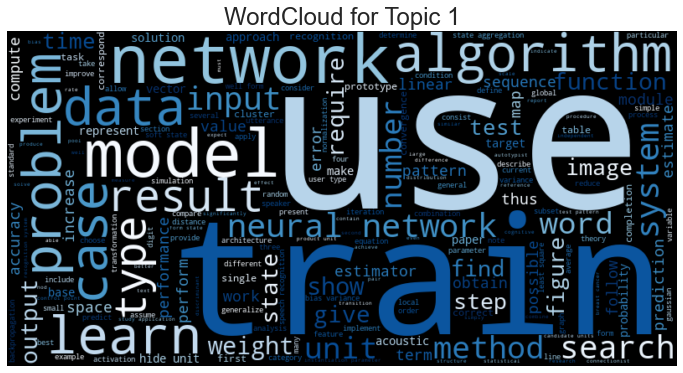

In [32]:
cloud=WordCloud(colormap="Blues",width=800,height=400).generate(str(data[data["Dominant Topic"]==1.0]["lemmatize_joined"]))
fig=plt.figure(figsize=(12,10))
plt.axis("off")
plt.imshow(cloud,interpolation='bilinear')
plt.title("WordCloud for Topic 1", size = 24)

Text(0.5, 1.0, 'WordCloud for Topic 2')

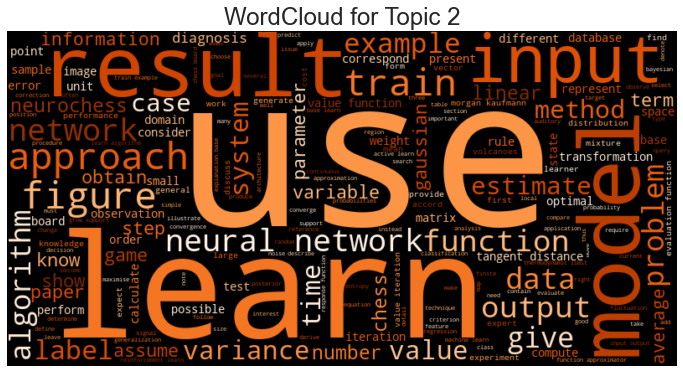

In [33]:
cloud=WordCloud(colormap="Oranges",width=800,height=400).generate(str(data[data["Dominant Topic"]==2.0]["lemmatize_joined"]))
fig=plt.figure(figsize=(12,10))
plt.axis("off")
plt.imshow(cloud,interpolation='bilinear')
plt.title("WordCloud for Topic 2", size = 24)

Text(0.5, 1.0, 'WordCloud for Topic 3')

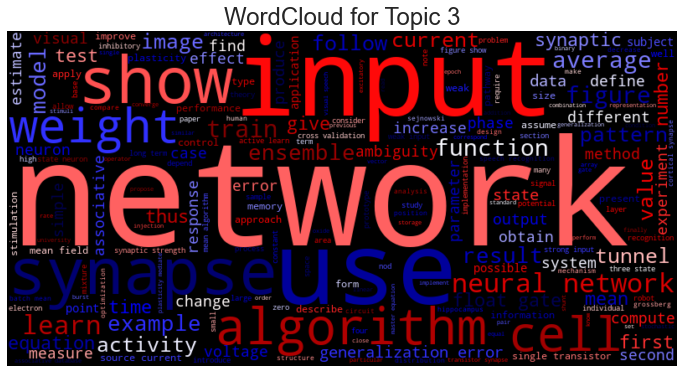

In [34]:
cloud=WordCloud(colormap="seismic",width=800,height=400).generate(str(data[data["Dominant Topic"]==3.0]["lemmatize_joined"]))
fig=plt.figure(figsize=(12,10))
plt.axis("off")
plt.imshow(cloud,interpolation='bilinear')
plt.title("WordCloud for Topic 3", size = 24)